-0.454545454545
1.09090909091
[[  3.29568411  -5.05050505]
 [ -5.05050505  12.11111111]]
[[-0.38243355]
 [ 0.84135381]]


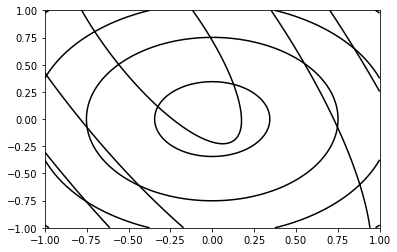

In [615]:
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
import numpy.random
from numpy.linalg import inv

#Define prior assumptions
identity_matrix = np.identity(2)
prior_w_mean = np.array([0,0])
prior_w_cov = identity_matrix
prior_w = multivariate_normal(prior_w_mean.flatten(), prior_w_cov)

#Plot contour
x = np.linspace(-1, 1, 100)
x1p, x2p = np.meshgrid(x,x)
x1p_flat = x1p.flatten()
x2p_flat = x2p.flatten()
pos = np.vstack((x1p_flat, x2p_flat))
pos = pos.T
Z = prior_w.pdf(pos)
Z = Z.reshape(100,100)
fig = plt.figure()
ax = fig.add_subplot(111)
prior_w_contour = ax.contour(x1p, x2p, Z, 3, colors='k')

#Generate x and y values
def get_random_x():
    index = np.random.randint(1, len(x)-1)
    random_x = x[index]
    return random_x
def generate_y_value(x_value):
    w = [-1.3, 0.5]
    y = x_value*w[0] + w[1]
    return y

def generate_x_and_ones_vector():
    x = get_random_x()
    x = np.array(x)
    ones = np.ones(1)

#Generate an x and turn into (1,2) matrix     
random_x = get_random_x()
random_x2 = get_random_x()
arr_x = np.array([random_x])
ones = np.ones(1)
x_and_ones = np.concatenate((arr_x, ones), axis=0)
x_and_ones = np.array([x_and_ones])
y = generate_y_value(random_x)

print(random_x)
print(y)

#Calculate posterior (formulas from GaussianIDentities.pdf end of page 4)
posterior_cov = (1/(0.3**2))*np.dot(x_and_ones.T, x_and_ones) + inv(identity_matrix)
posterior_mean = (1/(0.3**2))*np.dot(inv(posterior_cov), x_and_ones.T)*y
posterior_w = multivariate_normal(posterior_mean.flatten(), posterior_cov)

print(posterior_cov)
print(posterior_mean)

#Plot contour for posterior of w given single random datapoint
Z_posterior = posterior_w.pdf(pos)
Z_posterior = Z_posterior.reshape(100,100)
posterior_w_contour = ax.contour(x1p, x2p, Z_posterior, 3, colors='k')


#plt.scatter(random_x, y, color='g')
#plt.plot(random_x, y, 'r')
#y = x[:]*w[0] + w[1] + e[:,0]
plt.show()